MLB Salaries Project:

This project was aimed at identifying what is responsible for MLB salaries, whether on or off the field. In theory, only on field production should influence salaries, but in reality we see there are much more influential off field factors determining player and team salary. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
import seaborn as sns
from scipy.stats import linregress
from scipy import stats
from sklearn import preprocessing

In [2]:

#----- TEAM DATA GATHERING AND CLEANING-----

#Create DataFrames From The CSV Files For TEAMs' Salary Analysis
csv_path="Team_Data_Final.csv"
consolidated_data_df=pd.read_csv(csv_path)
consolidated_data_df.dtypes

#Additional Data from a second CSV File
csv_path2="Additional_Team_Data.csv"
additional_data_df=pd.read_csv(csv_path2)
additional_data_df = additional_data_df.rename(columns={'Year': 'yearID', 'Team': 'teamID'})
additional_data_df.dtypes
#NY Yankees Data 
csv_path3="NYYankees.csv"
additional_data_df1=pd.read_csv(csv_path3)
additional_data_df1 = additional_data_df1.rename(columns={'Year': 'yearID', 'Tm': 'teamID',"Est. Payroll":'Adjusted_Salary'})



#Convert the Adjusted_Salary from String to integer and convert million dollars two decimals
consol_data=(consolidated_data_df["Adjusted_Salary"].replace("[\$,]","",regex=True).astype(float))/1000000
#Convert the Attendence from String to integer 
Attendence_data=(consolidated_data_df["Attendance"].replace("[\,]","",regex=True).astype(float))/1000000
consolidated_data_df["Adjusted_Salary"]=consol_data
consolidated_data_df["Attendance"]=Attendence_data
consolidated_data_df.rename(columns={"Adjusted_Salary":"Adjusted_Salary(Million)","Unnamed: 6":"Adjustment Factor"})
consolidated_data_df.head()

#Calculating Winning Percentage Based On Games Played And Games Won And Adding Winning_% Column
consolidated_data_df["Winning_%"] = consolidated_data_df['W']*100/consolidated_data_df['G']
consolidated_data_df.head()

#Choosing Colors For Individual Teams And Adding Colors Column To DataFrame
color_1=[]
team_1=[]
i=0
consolidated_data_df["TeamColors"]="#0F0F0F"
hex(random.randint(0, 16777215))[2:].upper()
consolidated_data_df

for i in consolidated_data_df["teamID"].unique():
    color_1.append(((random.uniform(0, 1)),random.uniform(0, 1), random.uniform(0, 1)))
    team_1.append(i)
team_1
teamcolor={"teamID": team_1,
             "Color": color_1}
teamcolor_df=pd.DataFrame(teamcolor)
teamcolor_df.dtypes
i=0
while i < 330:
    teamer=consolidated_data_df['teamID'][i]
    #print(teamer)
    k=0
    while k<30:
        if teamcolor_df["teamID"][k]==teamer:
            consolidated_data_df['TeamColors'][i]= teamcolor_df["Color"][k]
        k=k+1
    i=i+1
consolidated_data_df.head()
team_color=consolidated_data_df['TeamColors']



/Users/bhavaniyella/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
#----- BATTERS DATA GATHERING AND CLEANING-----

#Create  DataFrames From The CSV Files For Batting Players' Salary Analysis
batting = pd.read_csv('battingStatsConsolidated.csv')
salaries = pd.read_csv('Batting_Data_Final.csv')
teamData = pd.read_csv("Team_Winning_Percent.csv")
salariesDf = salaries.dropna()
salariesDf.rename(columns = {'Year': 'yearID'}, inplace = True)
#Filtering out PA values that are less than 400 from the Batting CSV File
battingDf = batting.loc[batting['PA'] > 400]
#Merging the Batting players Salaries with Batting Players Stats
battingSalaries = pd.merge(battingDf, salariesDf, on= ['playerID', 'yearID'], how = 'inner')
battingSalaries.head()

#Filtering out the salaries less than $500,000.00
battingSalaries = battingSalaries.loc[battingSalaries['Salary_Adjusted'] > 500000]

consol_data1=(battingSalaries["Salary_Adjusted"].replace("[\$,]","",regex=True).astype(float))/1000000
battingSalaries["Salary_Adjusted"]=consol_data1


/Users/bhavaniyella/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [4]:
#----- PITCHERS DATA GATHERING AND CLEANING-----

# Define the file and folder path to read
player_salaries = "playersalary_adj_inflation_98_09.csv"
pitcher_stats = "pitcher_stats_98_09.csv"
player_salaries_df = pd.read_csv(player_salaries)
pitcher_stats_df = pd.read_csv(pitcher_stats)
player_salaries_df.head()

# Merge dataframes for Pitcher Stats and Player Salaries leaving only information about pitchers
pitcher_stat_salary_combined_df = pd.merge(pitcher_stats_df, player_salaries_df, on=["playerID", "Year"])
pitcher_stat_salary_combined_df.head()

# Add a new column IP = innings pitched which is IP = IPouts / 3 since there are 3 outs in each IP
pitcher_df = pitcher_stat_salary_combined_df.assign(IP = pitcher_stat_salary_combined_df.IPouts / 3)
pitcher_df.head()

# Filtering out so pitchers that have IP > 160 to qualify for ERA stat
# batting.loc[batting['AB'] > 100]
pitcher_ERA_df = pitcher_df.loc[pitcher_df["IP"] > 160]

# Filtering out so pitchers that have IP > 160 and Salary >$500k to qualify for ERA stat
pitcher_ERA_Pro_df = pitcher_ERA_df.loc[pitcher_ERA_df["Salary_Raw"] > 500000]

# Add a new column Salary_Mil = innings pitched which is IP = IPouts / 3 since there are 3 outs in each IP
pitcher_ERA_Pro_df = pitcher_ERA_Pro_df.assign(Salary_Mil = pitcher_ERA_Pro_df.Salary_Adjusted / 1000000)
pitcher_ERA_Pro_df.head()

playerID  Year Tm_x  Wins  IPouts   SO   ERA Tm_y  WAR  Salary_Raw  \
9   anderbr02  1998  ARI    12     624   95  4.33  ARI -0.4      775000   
13  ashbyan01  1998  SDN    17     680  151  3.34  SDP -0.2     4125000   
15  astacpe01  1998  COL    13     628  170  6.23  COL -0.1     3350000   
28  belchti01  1998  KCA    14     702  130  4.27  KCR  0.0     2300000   
30  benesan01  1998  ARI    14     694  164  3.97  ARI  0.4     6450000   

    Salary_Adjusted          IP  Salary_Mil  
9        1192307.69  208.000000    1.192308  
13       6346153.85  226.666667    6.346154  
15       5153846.15  209.333333    5.153846  
28       3538461.54  234.000000    3.538462  
30       9923076.92  231.333333    9.923077

y=38.706346x+(-6.425694)
0.7441623261315803
r-squared: 55.38%


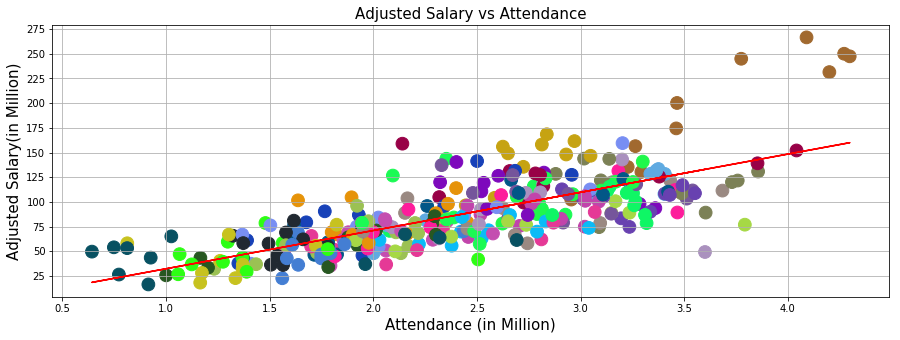

In [5]:
#-----TEAM PLOTS-----

#Plotting Adjusted Salary and Attendance with Team Colors

my_plot = consolidated_data_df.plot(kind="scatter", y="Adjusted_Salary", x="Attendance", grid=True,figsize=(15,5),color=team_color, sizes=(consolidated_data_df['G']))
plt.xlabel("Attendance (in Million)", size=15)
plt.ylabel("Adjusted Salary(in Million)", size=15)

plt.title("Adjusted Salary vs Attendance", size=15)
plt.yticks(np.arange(0, 300, 25.0))
plt.xticks(np.arange(0, 5,.5))
# calc the trendline
z = np.polyfit( consolidated_data_df["Attendance"],consolidated_data_df["Adjusted_Salary"], 1)
p = np.poly1d(z)
plt.plot(consolidated_data_df["Attendance"],p(consolidated_data_df["Attendance"]),"r")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

Y=consolidated_data_df["Adjusted_Salary"]
X=consolidated_data_df["Attendance"]
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))

y=38.706346x+(-6.425694)
0.4519057432423702
r-squared: 20.42%


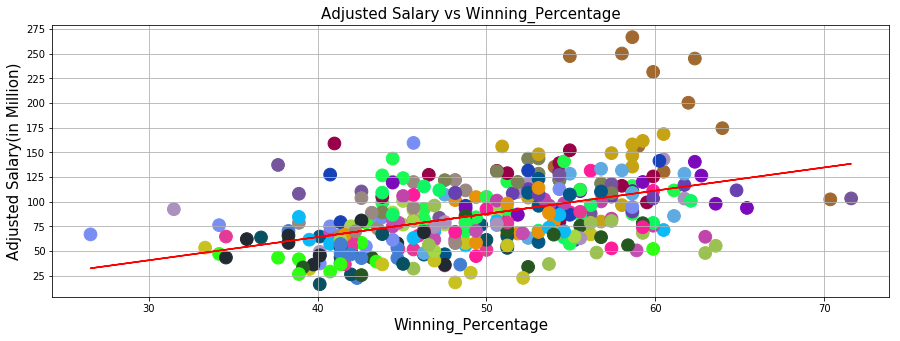

In [6]:
#-----TEAM PLOTS-----
#Plotting Adjusted Salary and Winning Percentage with Team Colors

my_plot = consolidated_data_df.plot(kind="scatter", y="Adjusted_Salary", x="Winning_%", grid=True,color=consolidated_data_df['TeamColors'],figsize=(15,5), sizes=(consolidated_data_df['G']))
plt.xlabel("Winning_Percentage", size=15)
plt.ylabel("Adjusted Salary(in Million)", size=15)
plt.title("Adjusted Salary vs Winning_Percentage", size=15)
plt.yticks(np.arange(0, 300, 25.0))
plt.xticks(np.arange(20, 100,10.0))
# calc the trendline
k = np.polyfit(consolidated_data_df["Winning_%"],consolidated_data_df["Adjusted_Salary"], 1)
p = np.poly1d(k)
plt.plot(consolidated_data_df["Winning_%"],p(consolidated_data_df["Winning_%"]),"r")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))

Y=consolidated_data_df["Adjusted_Salary"]
X=consolidated_data_df["Winning_%"]
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))

y=1.446081x+(-29.436624)
0.45126969381160903
r-squared: 20.36%


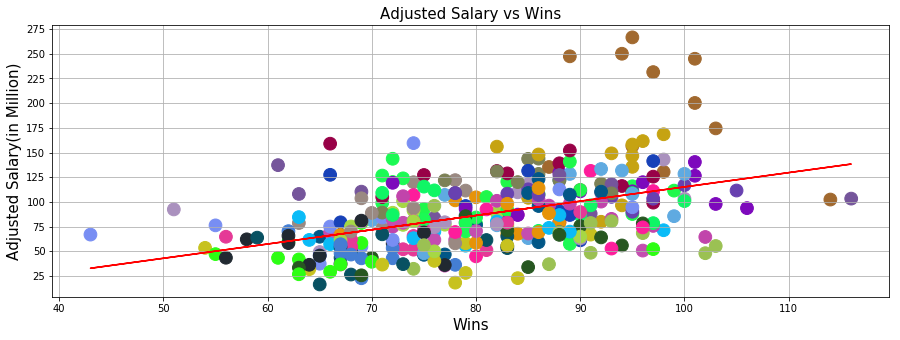

In [7]:
#-----TEAM PLOTS-----
#Plotting Adjusted Salary and Wins with Team Colors  (DID NOT USE FOR SLIDES)


my_plot = consolidated_data_df.plot(kind="scatter", y="Adjusted_Salary", x=["W"], grid=True,color=consolidated_data_df['TeamColors'],figsize=(15,5), sizes=(consolidated_data_df['G']))
plt.xlabel("Wins", size=15)
plt.ylabel("Adjusted Salary(in Million)", size=15)
plt.title("Adjusted Salary vs Wins", size=15)
plt.yticks(np.arange(0, 350, 25.0))
plt.xticks(np.arange(0, 200,10.0))
# calc the trendline
z = np.polyfit(consolidated_data_df["W"],consolidated_data_df["Adjusted_Salary"], 1)
p = np.poly1d(z)
plt.plot(consolidated_data_df["W"],p(consolidated_data_df["W"]),"r")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))


Y1=consolidated_data_df["Adjusted_Salary"]
X1=consolidated_data_df["W"]
slope, intercept, r_value, p_value, std_err = stats.linregress(X1,Y1)
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))

In [8]:
#-----TEAM PLOTS-----

#Selecting Individual Teams

Team_NYY=consolidated_data_df.loc[consolidated_data_df["teamID"]=="NYY"]
Team_OAK=consolidated_data_df.loc[consolidated_data_df["teamID"]=="OAK"]
Team_BOS=consolidated_data_df.loc[consolidated_data_df["teamID"]=="BOS"]
Team_KCR=consolidated_data_df.loc[consolidated_data_df["teamID"]=="KCR"]
Team_SFG=consolidated_data_df.loc[consolidated_data_df["teamID"]=="SFG"]

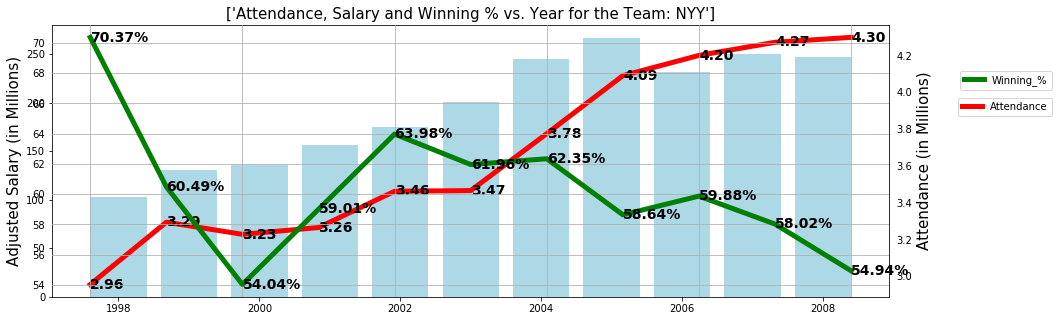

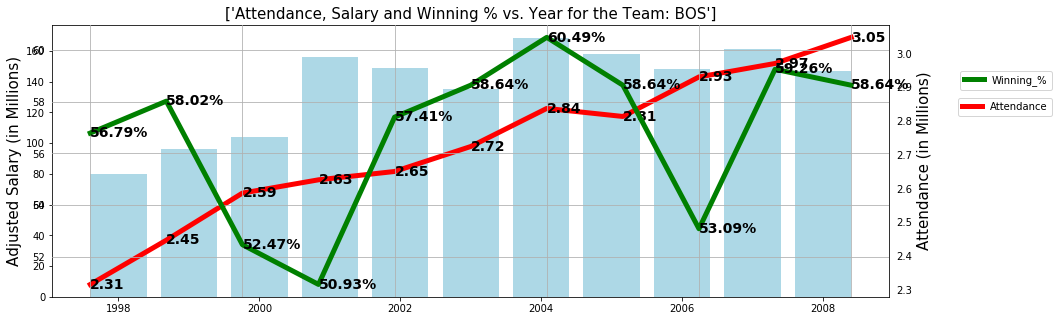

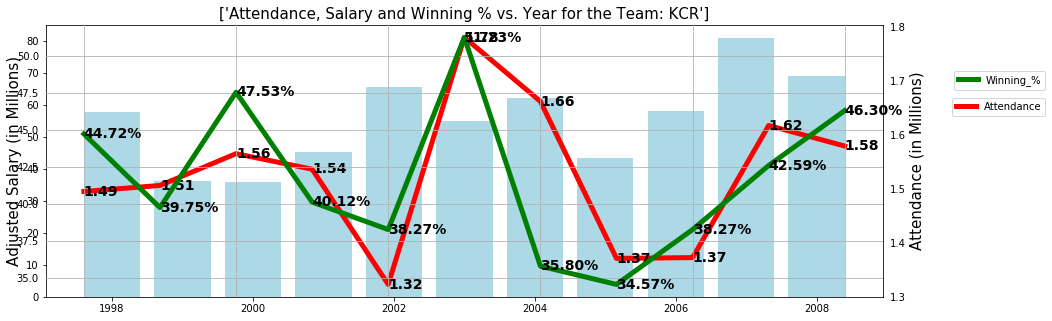

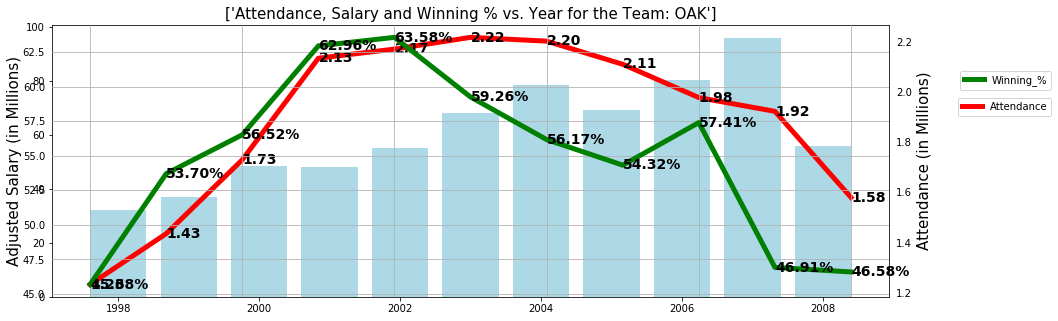

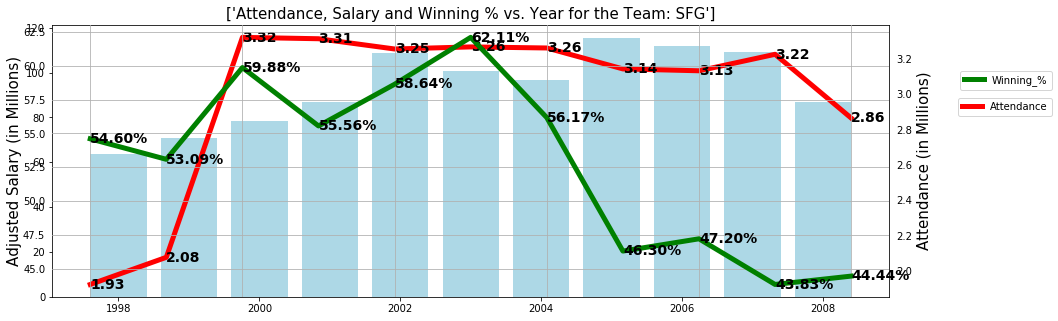

In [9]:
#-----TEAM PLOTS-----

#Plotting Individual team's Winning Percentage, Salaries and Attendance vs Year

def team_attendance1(z):
    x_values1=z["yearID"]
    y_values1=z["Adjusted_Salary"]

    x_values2=z["yearID"]
    y_values2=(z["Attendance"])
    
    x_values3=z["yearID"]
    y_values3=z["Winning_%"]
    
    fig=plt.figure(figsize=(15, 5))
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)
    ax3=fig.add_subplot(111, label="3", frame_on=False)

    ax.bar( x_values1, y_values1,color="lightblue")
    ax.set_ylabel("Adjusted Salary (in Millions)", size=15)
    plt.title("Attendance, Salary and Winning % vs. Year for the Team: "+z["teamID"].unique(), size=15)
    ax2.plot(x_values2, y_values2, color="r",linewidth=5.0)
    ax2.yaxis.tick_right()
    ax2.set_ylabel(('Attendance (in Millions)'),size=15)
    ax2.yaxis.set_label_position('right') 
    ax2.tick_params(axis='x', which='both', bottom='off', top='off',labelbottom='off')
    ax2.tick_params(axis='y')
    
    for x, y in zip(x_values2, y_values2):
        ax2.annotate("{0:.2f}".format(y), xy=(x, y),weight='bold',  ha='left', va='center', size=14)
    
    ax2.tick_params(
    axis='y',which='both',right='off',left='off',labelbottom='off')
    plt.grid()
    
    ax3.plot(x_values3, y_values3, color="g", linewidth=5.0)

    for x, y in zip(x_values3, y_values3):
        ax3.annotate("{0:.2f}%".format(y), xy=(x, y), weight='bold',  ha='left', va='center', size=14)
    ax3.tick_params(
    axis='x',which='both',bottom='off',top='off',labelbottom='off')
    
    ax3.tick_params(
    axis='y',which='both',right='off',left='off',labelbottom='off')
    plt.grid()
    plt.grid()
    ax2.legend(bbox_to_anchor=(1.2, 0.75))
    ax3.legend(bbox_to_anchor=(1.2, .85))
    
result = team_attendance1(Team_NYY)
result = team_attendance1(Team_BOS)
result = team_attendance1(Team_KCR)
result = team_attendance1(Team_OAK)
result = team_attendance1(Team_SFG)

In [10]:
#-----TEAM Correlation Matrix-----
#Calculating the Correlation Matrix with Additional Data
additional_data_df.corr()

yearID        RS        RA         W       OBP  \
yearID           1.000000e+00 -0.166575 -0.156456  0.001286 -0.153817   
RS              -1.665755e-01  1.000000  0.080442  0.604600  0.892441   
RA              -1.564561e-01  0.080442  1.000000 -0.672369 -0.003666   
W                1.286296e-03  0.604600 -0.672369  1.000000  0.606272   
OBP             -1.538174e-01  0.892441 -0.003666  0.606272  1.000000   
SLG             -9.845112e-02  0.890913  0.088838  0.536099  0.748894   
BA              -6.002095e-02  0.794657  0.088227  0.458992  0.796548   
Playoffs         1.443486e-17  0.408094 -0.469459  0.708573  0.417766   
G               -9.562922e-03  0.152491 -0.047878  0.138314  0.109303   
Adjusted_Salary  2.507158e-01  0.319917 -0.277019  0.439965  0.335993   
Attendance       1.291764e-01  0.347823 -0.340971  0.495714  0.383877   
 Winning_%       1.175117e-03  0.603944 -0.671461  0.999071  0.607839   

                      SLG        BA      Playoffs         G  Adjusted_Salary  \
yearID          -0.098451 -0.060021  1.443486e-17 -0.009563         0.250716   
RS               0.890913  0.794657  4.080938e-01  0.152491         0.319917   
RA               0.088838  0.088227 -4.694592e-01 -0.047878        -0.277019   
W                0.536099  0.458992  7.085728e-01  0.138314         0.439965   
OBP              0.748894  0.796548  4.177659e-01  0.109303         0.335993   
SLG              1.000000  0.727250  3.419133e-01  0.120069         0.312635   
BA               0.727250  1.000000  3.039797e-01  0.107454         0.282372   
Playoffs         0.341913  0.303980  1.000000e+00  0.030773         0.363505   
G                0.120069  0.107454  3.077287e-02  1.000000         0.024658   
Adjusted_Salary  0.312635  0.282372  3.635054e-01  0.024658         1.000000   
Attendance       0.329673  0.306235  3.888591e-01  0.089246         0.744162   
 Winning_%       0.535176  0.457757  7.122200e-01  0.122414         0.440123   

                 Attendance   Winning_%   
yearID             0.129176     0.001175  
RS                 0.347823     0.603944  
RA                -0.340971    -0.671461  
W                  0.495714     0.999071  
OBP                0.383877     0.607839  
SLG                0.329673     0.535176  
BA                 0.306235     0.457757  
Playoffs           0.388859     0.712220  
G                  0.089246     0.122414  
Adjusted_Salary    0.744162     0.440123  
Attendance         1.000000     0.497789  
 Winning_%         0.497789     1.000000

In [11]:
#New York Yankees Team Analysis since 1984

Team_NYYanks=additional_data_df1.loc[additional_data_df1["yearID"]>1983]
Team_NYYanks.count()


Team_NYYanks1=(Team_NYYanks["Adjusted_Salary"].replace("[\$,]","",regex=True).astype(float))/1000000
Team_NYYanks["Adjusted_Salary"]=Team_NYYanks1


/Users/bhavaniyella/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


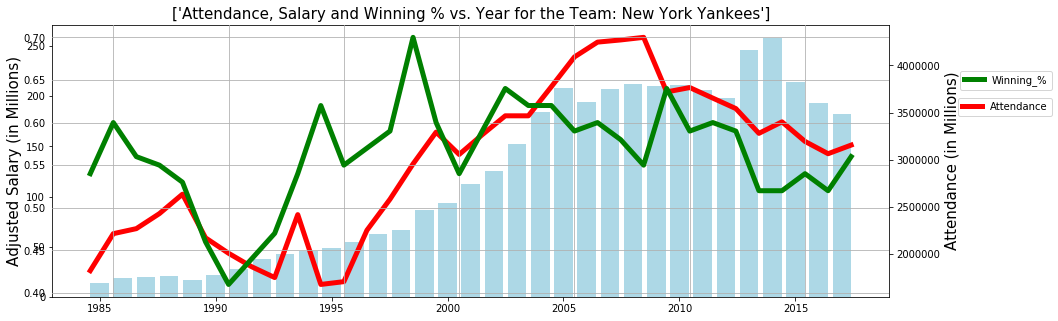

In [12]:
def team_attendance2(z):
    x_values1=z["yearID"]
    y_values1=z["Adjusted_Salary"]

    x_values2=z["yearID"]
    y_values2=(z["Attendance"])
    
    x_values3=z["yearID"]
    y_values3=z["Winning_%"]
    
    fig=plt.figure(figsize=(15, 5))
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)
    ax3=fig.add_subplot(111, label="3", frame_on=False)

    ax.bar( x_values1, y_values1,color="lightblue")
    ax.set_ylabel("Adjusted Salary (in Millions)", size=15)
    plt.title("Attendance, Salary and Winning % vs. Year for the Team: "+z["teamID"].unique(), size=15)
    ax2.plot(x_values2, y_values2, color="r",linewidth=5.0)
    ax2.yaxis.tick_right()
    ax2.set_ylabel(('Attendance (in Millions)'),size=15)
    ax2.yaxis.set_label_position('right') 
    ax2.tick_params(axis='x', which='both', bottom='off', top='off',labelbottom='off')
    ax2.tick_params(axis='y')
    plt.grid()
    
    ax3.plot(x_values3, y_values3, color="g", linewidth=5.0)

    ax3.tick_params(
    axis='x',which='both',bottom='off',top='off',labelbottom='off')
    
    ax3.tick_params(
    axis='y',which='both',right='off',left='off',labelbottom='off')
    plt.grid()
    plt.grid()
    ax2.legend(bbox_to_anchor=(1.2, 0.75))
    ax3.legend(bbox_to_anchor=(1.2, .85))
    
result = team_attendance2(Team_NYYanks)

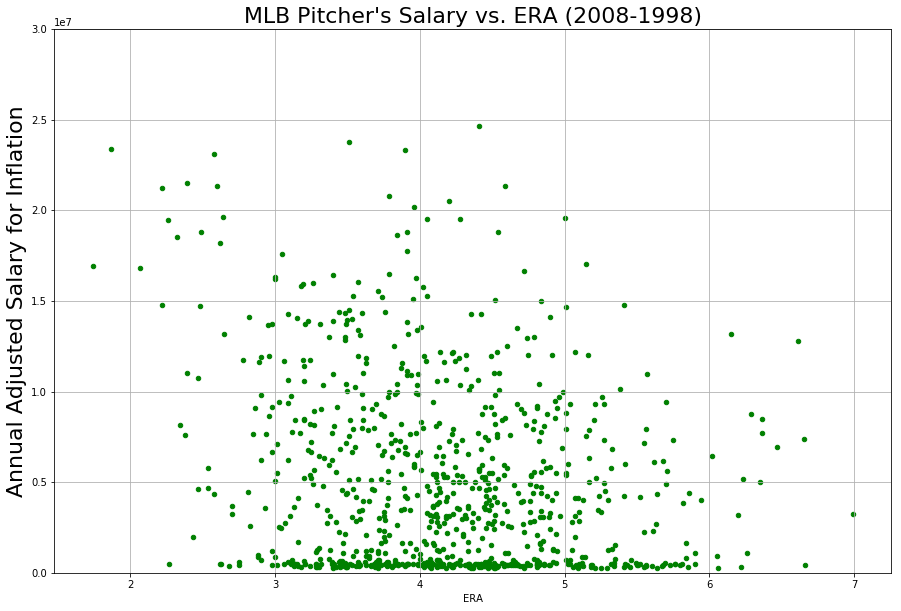

In [13]:
#-----PITCHING PLAYER PLOTS-----
# Plotting Pitcher's Salary And ERA

salary_era_plot = pitcher_ERA_df.plot(kind="scatter", x="ERA", y="Salary_Adjusted", grid=True, figsize=(15,10), color = "green", title = "MLB Pitcher's Salary vs. ERA (2008-1998)")
salary_era_plot.set_ylabel("Annual Adjusted Salary for Inflation", fontsize=22)
salary_era_plot.set_title(salary_era_plot.title.get_text(), fontsize=22)
salary_era_plot.set_ylim(0,30000000)
plt.show()


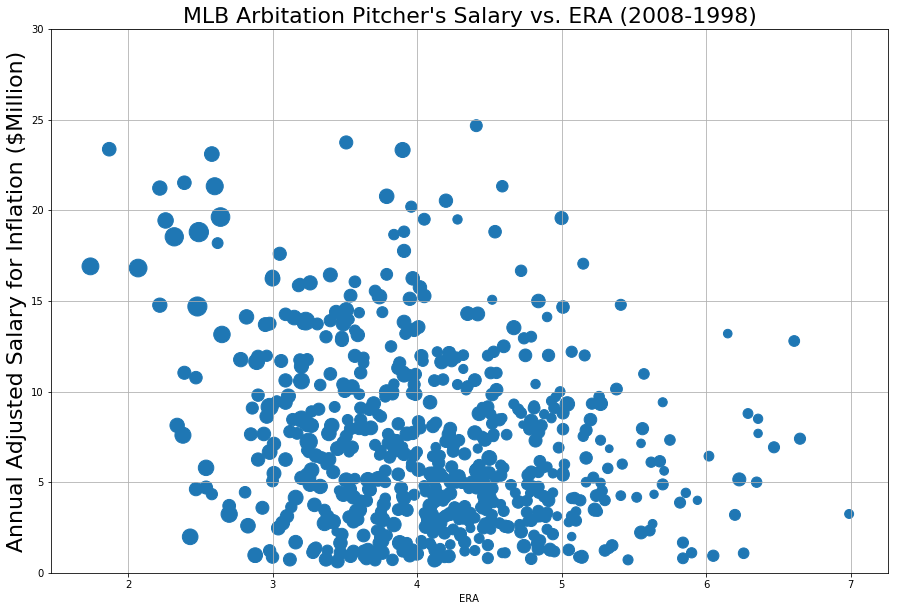

In [14]:
# Plotting Aribtration Pitcher's Salary And ERA

salary_era_Pro_plot = pitcher_ERA_Pro_df.plot(kind="scatter", x="ERA", y="Salary_Mil", grid=True, figsize=(15,10), title = "MLB Arbitation Pitcher's Salary vs. ERA (2008-1998)", sizes=(pitcher_ERA_Pro_df["SO"]))
salary_era_Pro_plot.set_ylabel("Annual Adjusted Salary for Inflation ($Million)", fontsize=22)
salary_era_Pro_plot.set_title(salary_era_Pro_plot.title.get_text(), fontsize=22)
salary_era_Pro_plot.set_ylim(0,30)
plt.show()

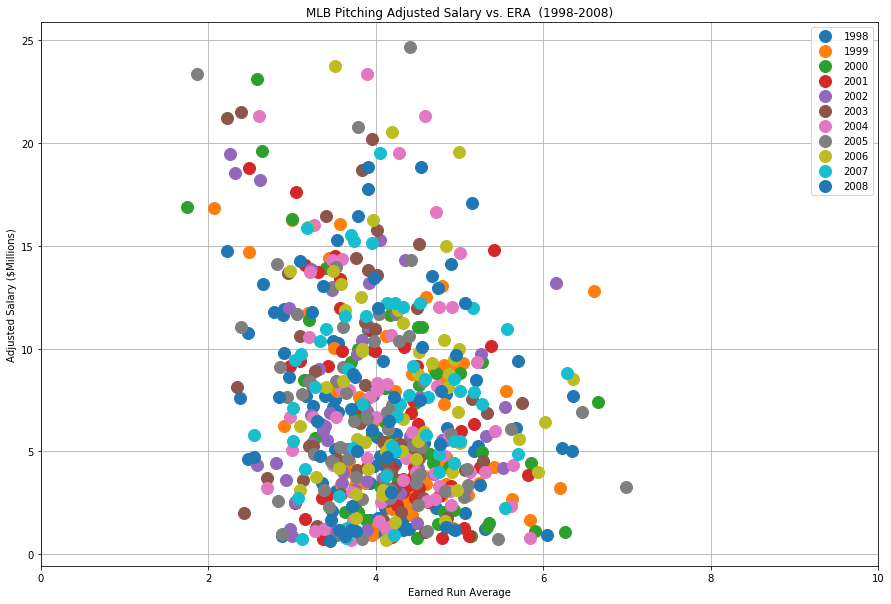

In [15]:

# Plotting Aribtration Pitcher's Salary And ERA

groups = pitcher_ERA_Pro_df.groupby("Year")

fig, ax = plt.subplots(figsize=(15,10))
ax.margins(0.05) 

# Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.ERA, group.Salary_Mil, marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.title("MLB Pitching Adjusted Salary vs. ERA  (1998-2008)")
plt.ylabel("Adjusted Salary ($Millions)")
plt.xlabel("Earned Run Average")
plt.xlim((0,10))
plt.grid(True)
plt.show()



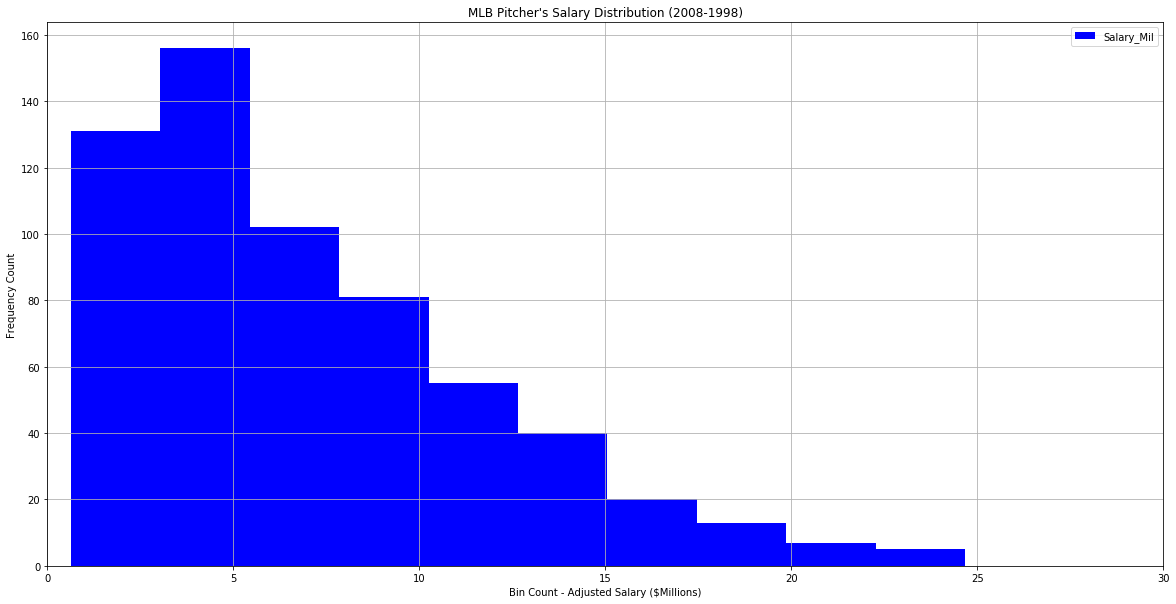

In [16]:
salary_ERA_plot = pitcher_ERA_Pro_df.plot(kind="hist", x="ERA", y="Salary_Mil", grid=True, figsize=(20,10), color = "blue", title = "MLB Pitcher's Salary Distribution (2008-1998)")
plt.ylabel("Frequency Count")
plt.xlabel("Bin Count - Adjusted Salary ($Millions)")
plt.xlim((0,30))
plt.grid(True)
plt.show()

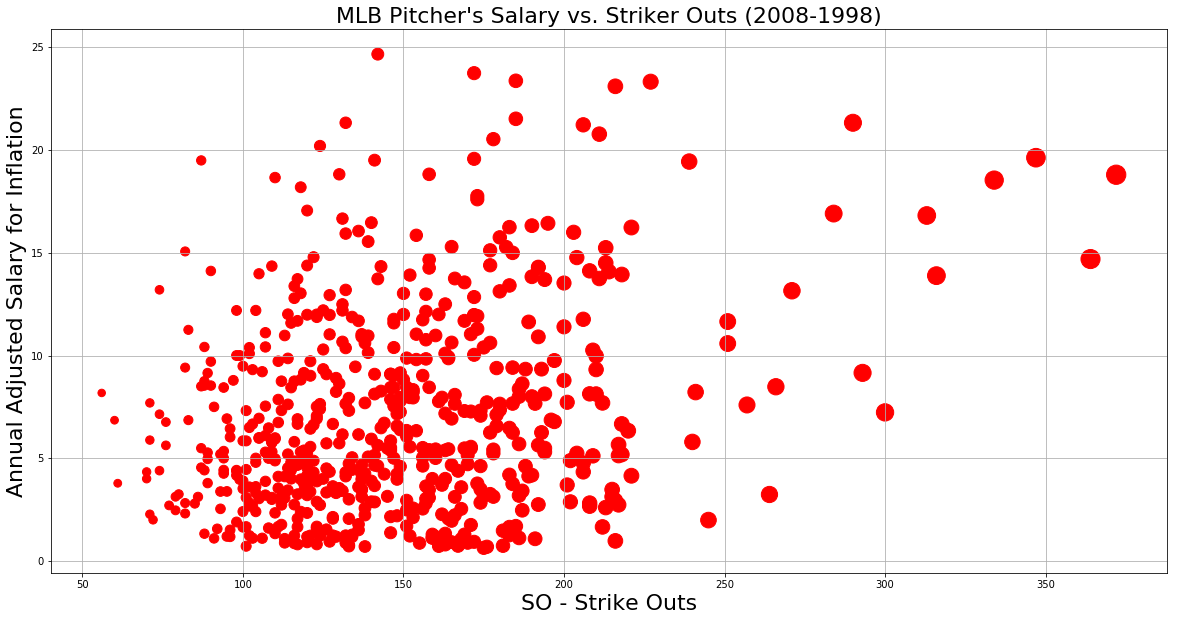

In [17]:
# Plotting Aribtration Pitcher's Salary And Strike-Outs
salary_SO_plot = pitcher_ERA_Pro_df.plot(kind="scatter", x="SO", y="Salary_Mil", grid=True, figsize=(20,10), color = "red", title = "MLB Pitcher's Salary vs. Striker Outs (2008-1998)", sizes=(pitcher_ERA_Pro_df["SO"]))
salary_SO_plot.set_xlabel("SO - Strike Outs", fontsize=22)
salary_SO_plot.set_ylabel("Annual Adjusted Salary for Inflation", fontsize=22)
salary_SO_plot.set_title(salary_SO_plot.title.get_text(), fontsize=22)
plt.show()

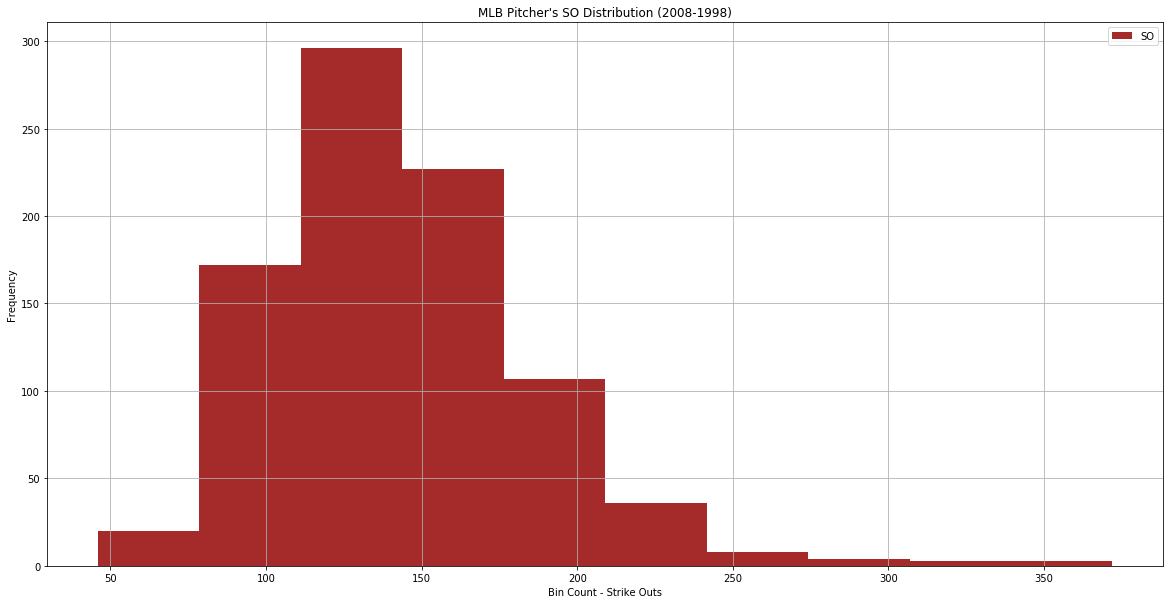

In [18]:
salary_SO_plot = pitcher_ERA_df.plot(kind="hist", x="Salary_Adjusted", y="SO", grid=True, figsize=(20,10), color = "brown", title = "MLB Pitcher's SO Distribution (2008-1998)")

plt.xlabel("Bin Count - Strike Outs")

plt.show()

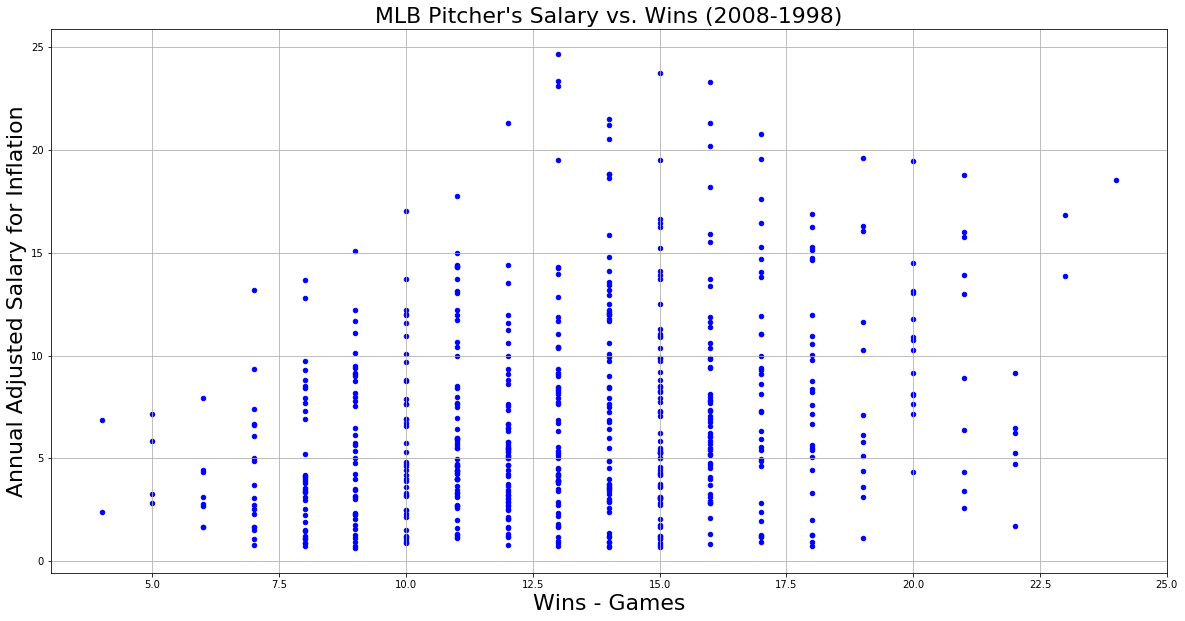

In [19]:
salary_wins_plot = pitcher_ERA_Pro_df.plot(kind="scatter", x="Wins", y="Salary_Mil", grid=True, figsize=(20,10), color = "blue", title = "MLB Pitcher's Salary vs. Wins (2008-1998)")
salary_wins_plot.set_xlabel("Wins - Games", fontsize=22)
salary_wins_plot.set_ylabel("Annual Adjusted Salary for Inflation", fontsize=22)
salary_wins_plot.set_title(salary_wins_plot.title.get_text(), fontsize=22)
plt.show()

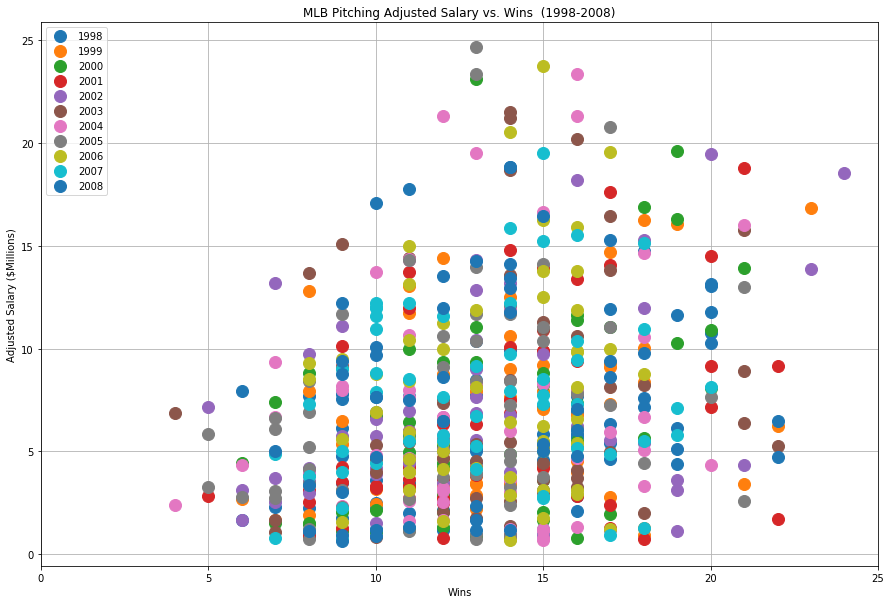

In [20]:
# Plotting Aribtration Pitcher's Salary And Wins

groups = pitcher_ERA_Pro_df.groupby("Year")

fig, ax = plt.subplots(figsize=(15,10))
ax.margins(0.05) 

# Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Wins, group.Salary_Mil, marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.title("MLB Pitching Adjusted Salary vs. Wins  (1998-2008)")
plt.ylabel("Adjusted Salary ($Millions)")
plt.xlabel("Wins")
plt.xlim((0,25))
plt.grid(True)
plt.show()

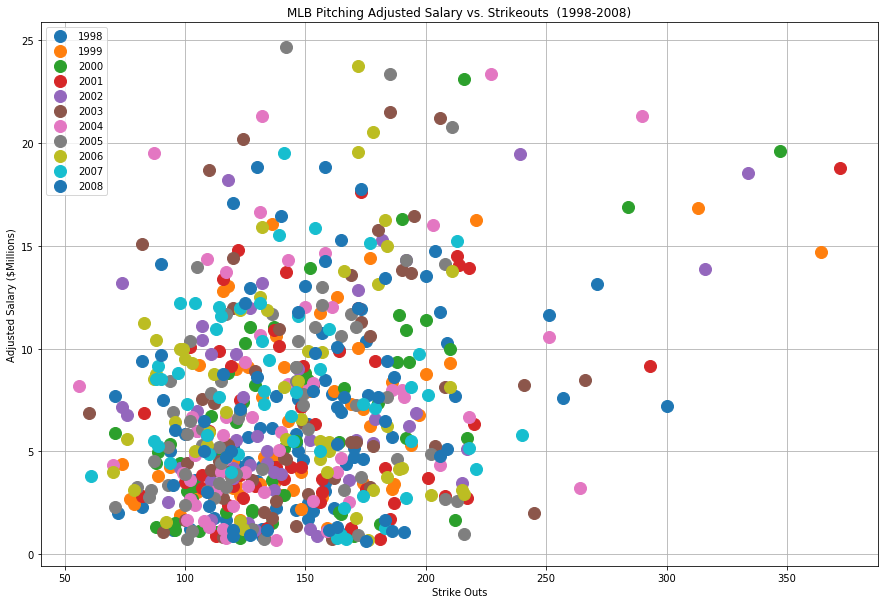

In [21]:
groups = pitcher_ERA_Pro_df.groupby("Year")

fig, ax = plt.subplots(figsize=(15,10))
ax.margins(0.05) 

# Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.SO, group.Salary_Mil, marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.title("MLB Pitching Adjusted Salary vs. Strikeouts  (1998-2008)")
plt.ylabel("Adjusted Salary ($Millions)")
plt.xlabel("Strike Outs")
plt.grid(True)
plt.show()

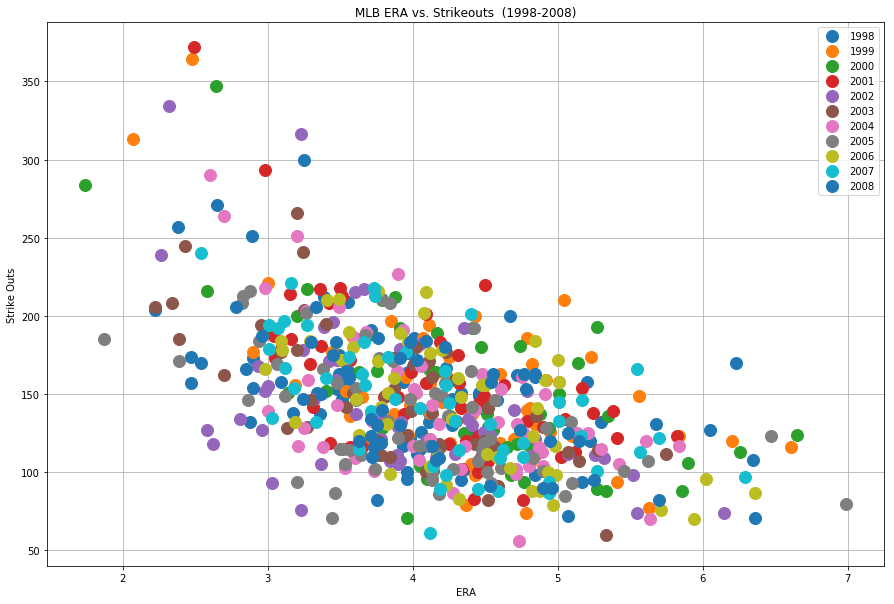

In [22]:
groups = pitcher_ERA_Pro_df.groupby("Year")

fig, ax = plt.subplots(figsize=(15,10))
ax.margins(0.05) 

# Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.ERA, group.SO, marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.title("MLB ERA vs. Strikeouts  (1998-2008)")
plt.ylabel("Strike Outs")
plt.xlabel("ERA")
plt.grid(True)
plt.show()

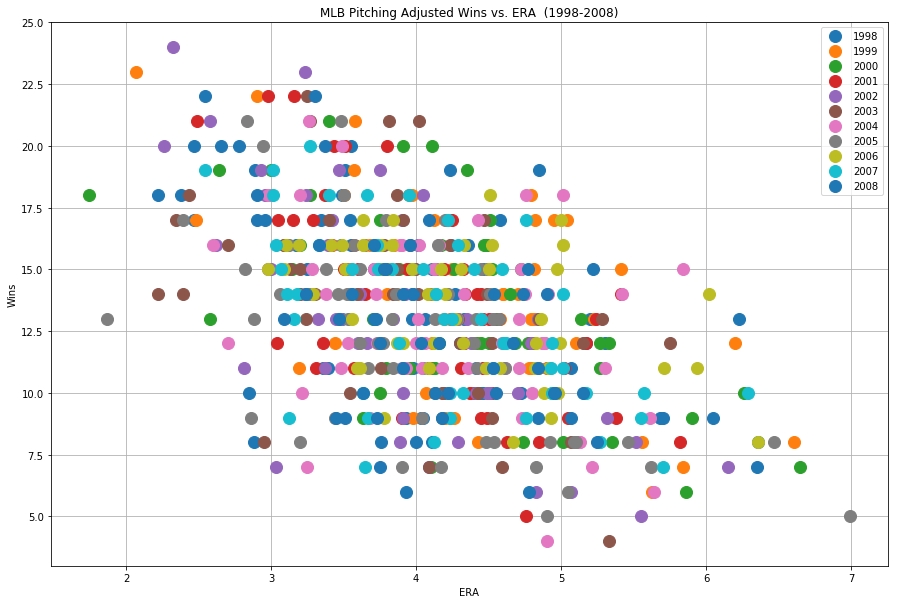

In [23]:
groups = pitcher_ERA_Pro_df.groupby("Year")

fig, ax = plt.subplots(figsize=(15,10))
ax.margins(0.05) 

# Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.ERA, group.Wins, marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.title("MLB Pitching Adjusted Wins vs. ERA  (1998-2008)")
plt.ylabel("Wins")
plt.xlabel("ERA")
plt.grid(True)
plt.show()

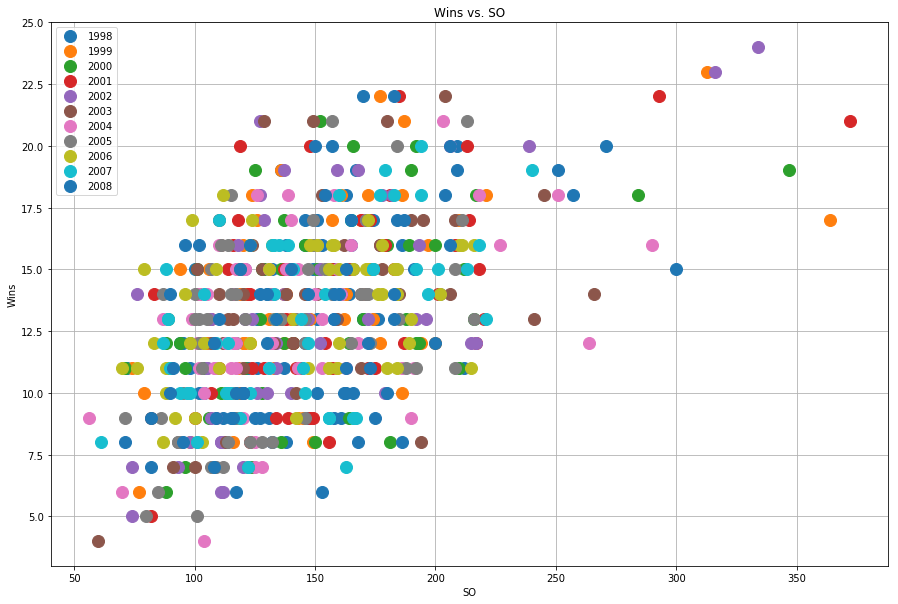

In [24]:
groups = pitcher_ERA_Pro_df.groupby("Year")

fig, ax = plt.subplots(figsize=(15,10))
ax.margins(0.05) 

# Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.SO, group.Wins, marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.title("Wins vs. SO")
plt.ylabel("Wins")
plt.xlabel("SO")
plt.grid(True)
plt.show()

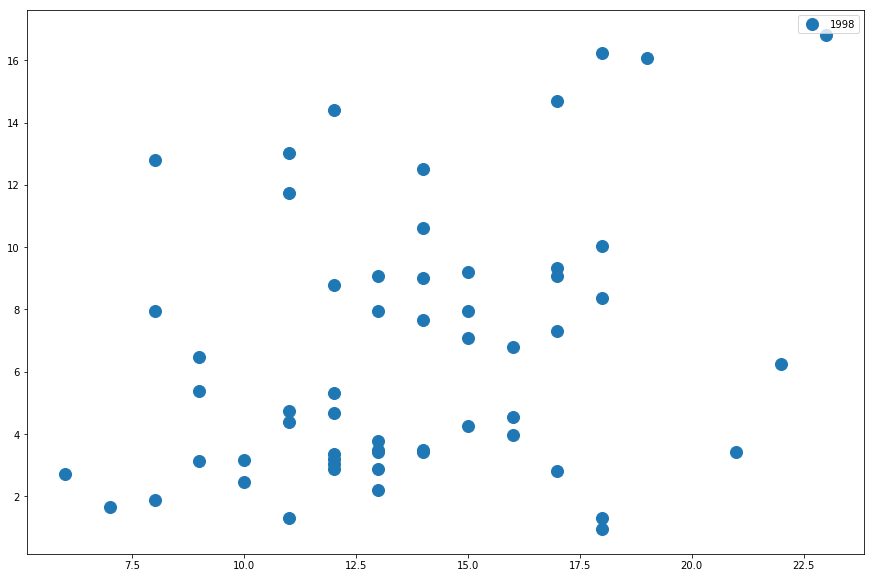

y=0.361793x+(1.629639)
0.3154293925846036
r-squared: 9.95%


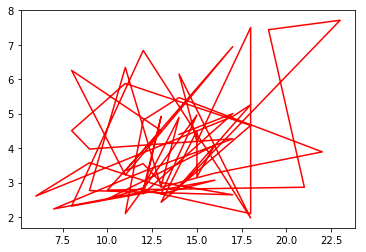

In [25]:
g = pitcher_ERA_Pro_df.groupby("Year")
g.get_group(1998)
#print (g.get_group(1998))
fig, ax = plt.subplots(figsize=(15,10))
ax.margins(0.05) 

# Optional, just adds 5% padding to the autoscaling
# for name, group in groups:
ax.plot(g.get_group(1999).Wins, g.get_group(1999).Salary_Mil, marker='o', linestyle='', ms=12, label="1998")
ax.legend()
plt.show()

z = np.polyfit(g.get_group(1999).Wins,g.get_group(1999).Salary_Mil, 1)
p = np.poly1d(z)
plt.plot(g.get_group(1999).Wins,p(g.get_group(1999).Salary_Mil),"r")
# the line equation:
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))
Y=g.get_group(1999).Salary_Mil
X=g.get_group(1999).Wins
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))

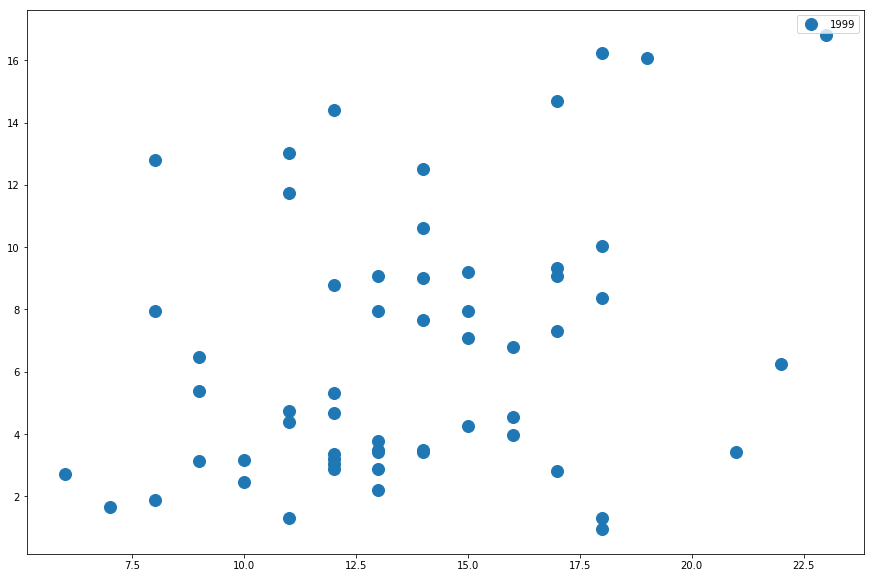

In [26]:
g = pitcher_ERA_Pro_df.groupby("Year")
g.get_group(1999)
fig, ax = plt.subplots(figsize=(15,10))
ax.margins(0.05) 

# Optional, just adds 5% padding to the autoscaling
# for name, group in groups:
ax.plot(g.get_group(1999).Wins, g.get_group(1999).Salary_Mil, marker='o', linestyle='', ms=12, label="1999")
ax.legend()
plt.show()

Text(0.5,0,'Bins - Wins')

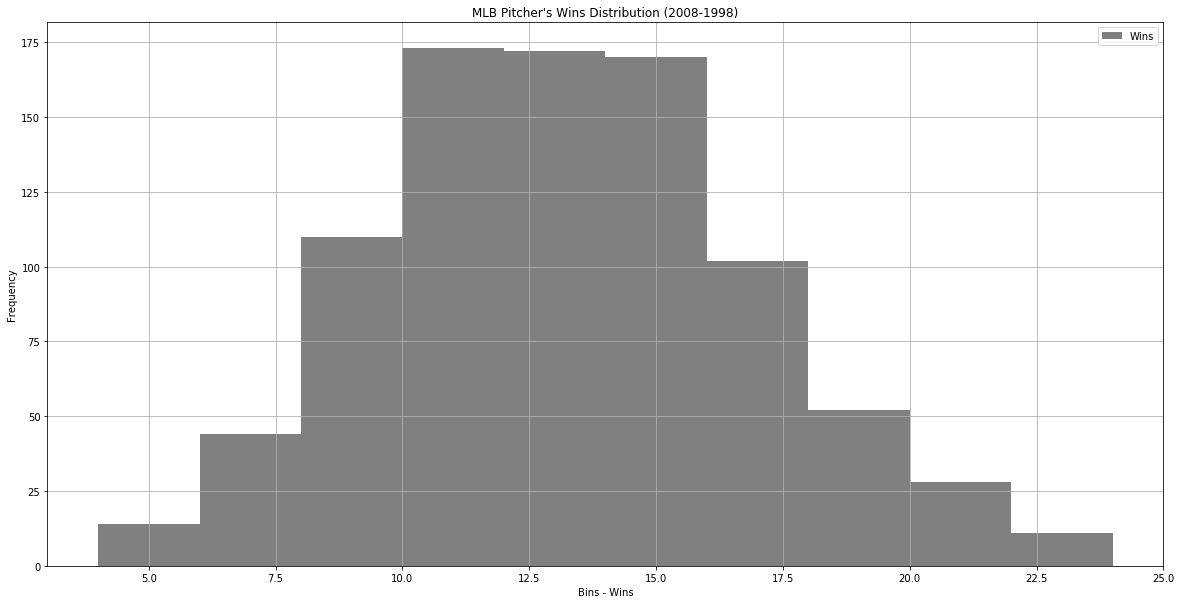

In [27]:
salary_SO_plot = pitcher_ERA_df.plot(kind="hist", x="Salary_Adjusted", y="Wins", grid=True, figsize=(20,10), color = "grey", title = "MLB Pitcher's Wins Distribution (2008-1998)")
plt.xlabel("Bins - Wins")

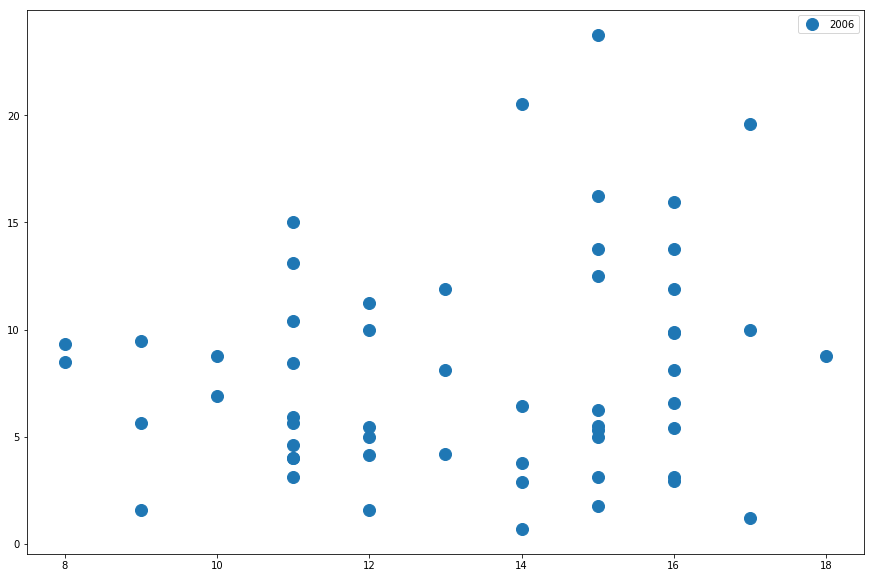

In [28]:
g = pitcher_ERA_Pro_df.groupby("Year")
g.get_group(2006)
fig, ax = plt.subplots(figsize=(15,10))
ax.margins(0.05) 

# Optional, just adds 5% padding to the autoscaling
# for name, group in groups:
ax.plot(g.get_group(2006).Wins, g.get_group(2006).Salary_Mil, marker='o', linestyle='', ms=12, label="2006")
ax.legend()
plt.show()

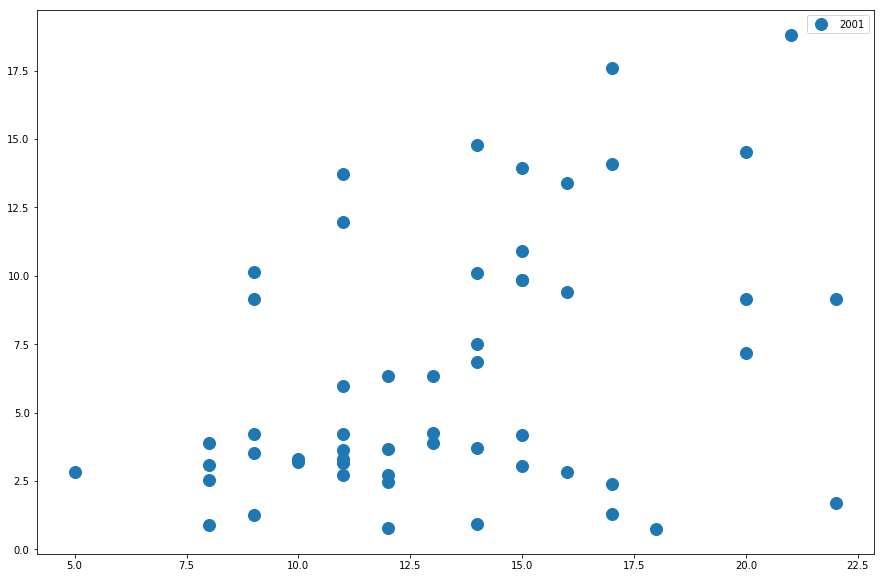

In [29]:
g = pitcher_ERA_Pro_df.groupby("Year")
g.get_group(2001)
fig, ax = plt.subplots(figsize=(15,10))
ax.margins(0.05) 

# Optional, just adds 5% padding to the autoscaling
# for name, group in groups:
ax.plot(g.get_group(2001).Wins, g.get_group(2001).Salary_Mil, marker='o', linestyle='', ms=12, label="2001")
ax.legend()
plt.show()

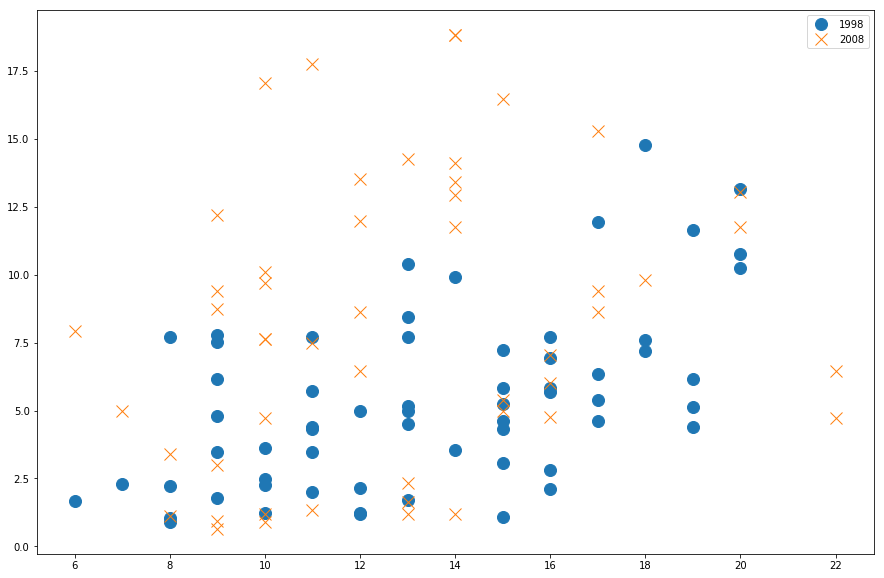

In [30]:
#1998 vs. #2008
g = pitcher_ERA_Pro_df.groupby("Year")
g.get_group(1998)
#print (g.get_group(1998))
fig, ax = plt.subplots(figsize=(15,10))
ax.margins(0.05) 

# Optional, just adds 5% padding to the autoscaling
# for name, group in groups:
ax.plot(g.get_group(1998).Wins, g.get_group(1998).Salary_Mil, marker='o', linestyle='', ms=12, label="1998")
ax.plot(g.get_group(2008).Wins, g.get_group(2008).Salary_Mil, marker='x', linestyle='', ms=12, label="2008")
ax.legend()
plt.show()

Text(0.5,0,'Bins - ERA')

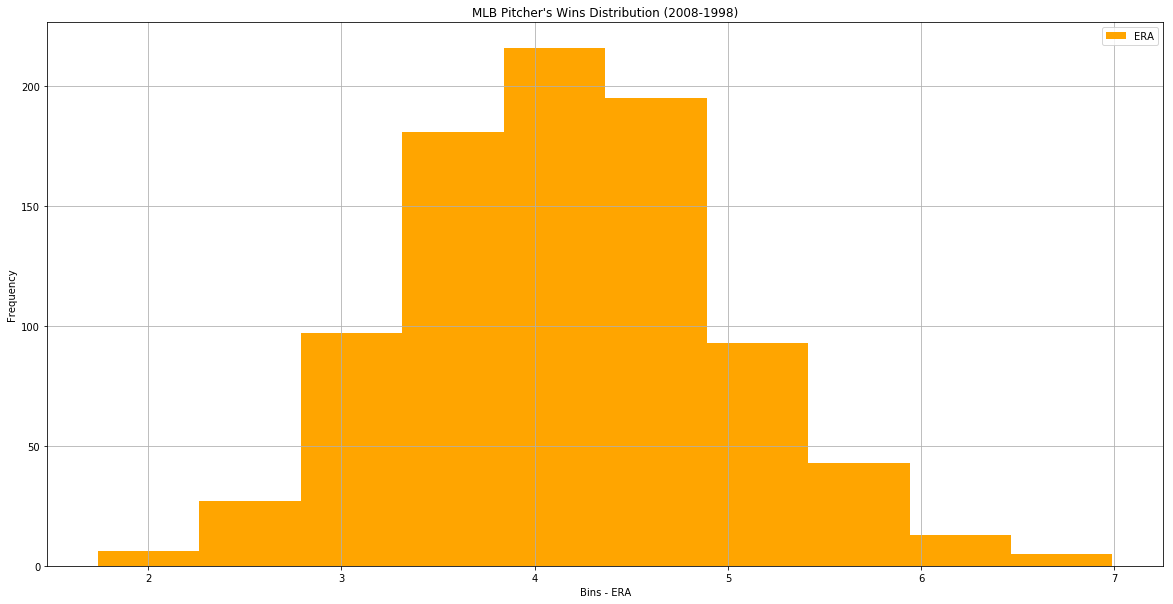

In [31]:
salary_ERA_plot = pitcher_ERA_df.plot(kind="hist", x="Salary_Adjusted", y="ERA", grid=True, figsize=(20,10), color = "orange", title = "MLB Pitcher's Wins Distribution (2008-1998)")
plt.xlabel("Bins - ERA")

y=0.7209285329124359x+4.796793496435749
0.28650437324601286
r-squared: 8.21%


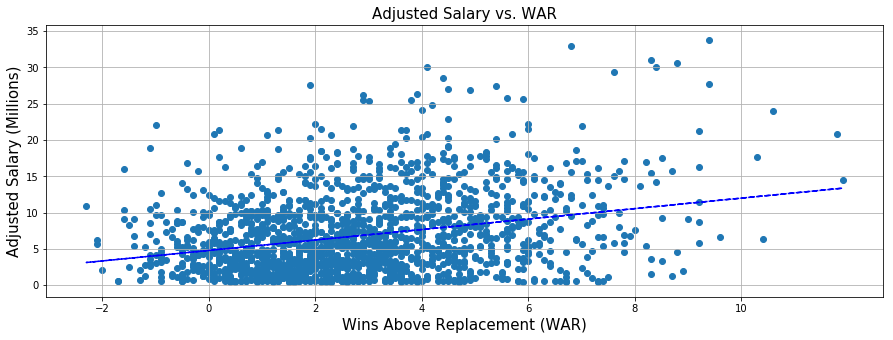

In [32]:
#-----BATTING PLAYER PLOTS-----

#Plotting Batting Player WAR And Salary


X = battingSalaries['WAR']
Y = (battingSalaries['Salary_Adjusted'])
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(-2, 12, 2))
plt.xlabel('Wins Above Replacement (WAR)', size=15)
plt.ylabel('Adjusted Salary (Millions)', size=15)
plt.title('Adjusted Salary vs. WAR', size=15)

plt.scatter(X, Y)
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=0.18459114661784054x+3.204749361842228
0.38896446279318475
r-squared: 15.13%


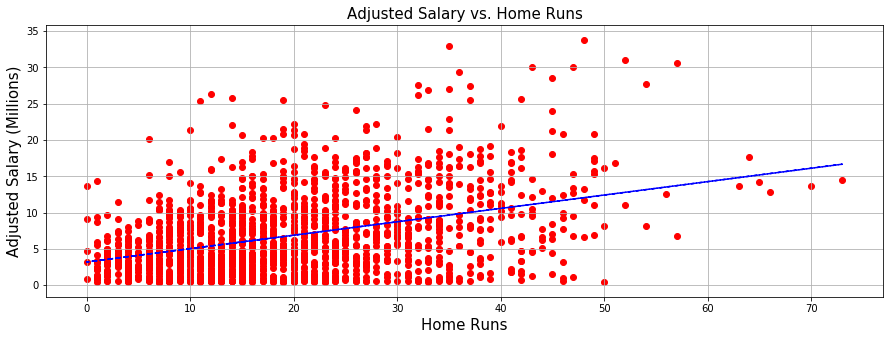

In [33]:
#-----BATTING PLAYER PLOTS-----

#Plotting Batting Player HR And Salary

X = battingSalaries['HR']
Y = (battingSalaries['Salary_Adjusted'])
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(0, 80, 10))
plt.xlabel('Home Runs', size = 15)
plt.ylabel('Adjusted Salary (Millions)', size = 15)
plt.title('Adjusted Salary vs. Home Runs', size = 15)

plt.scatter(X, Y, color = 'r')
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=0.07355129441292341x+1.1993387226793297
0.3592164581486359
r-squared: 12.90%


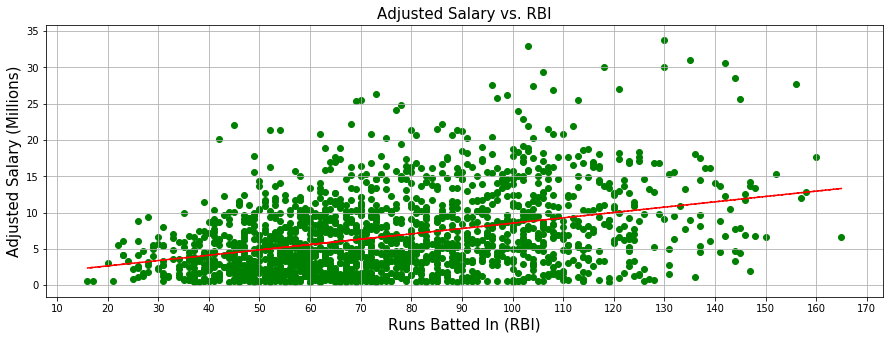

In [34]:
#-----BATTING PLAYER PLOTS-----

#Plotting Batting Player RBI And Salary

X = battingSalaries['RBI']
Y = (battingSalaries['Salary_Adjusted'])
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(0, 200, 10))
plt.xlabel('Runs Batted In (RBI)', size = 15)
plt.ylabel('Adjusted Salary (Millions)', size = 15)
plt.title('Adjusted Salary vs. RBI', size = 15)

plt.scatter(X, Y, color = 'g')
plt.plot(X, fit, 'r--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=33.54131569675818x+-2.6051708314485724
0.1693268880710149
r-squared: 2.87%


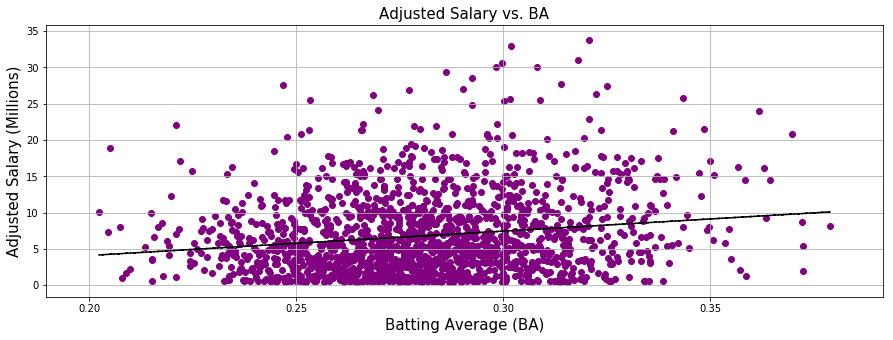

In [35]:
#-----BATTING PLAYER PLOTS-----

#Plotting Batting Player Batting Average And Salary


X = battingSalaries['H']/battingSalaries['AB']
Y = (battingSalaries['Salary_Adjusted'])
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(0, .400, .050))
plt.xlabel('Batting Average (BA)', size = 15)
plt.ylabel('Adjusted Salary (Millions)', size = 15)
plt.title('Adjusted Salary vs. BA', size = 15)

plt.scatter(X, Y, color = 'purple')
plt.plot(X, fit, 'k--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=50.47078604365229x+-11.277517976463596
0.3788366144733728
r-squared: 14.35%


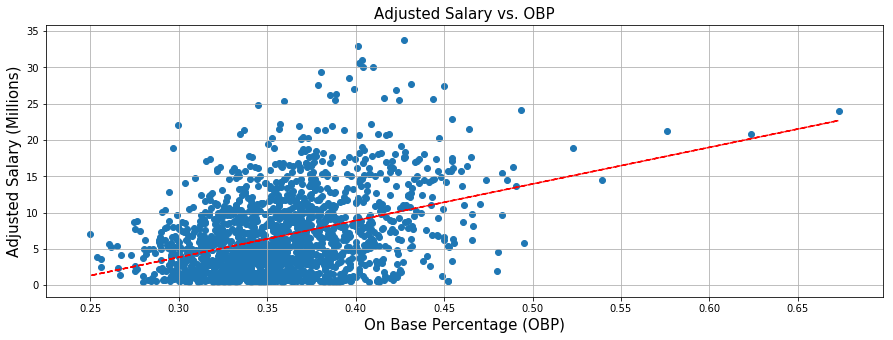

In [36]:
#-----BATTING PLAYER PLOTS-----

#Plotting Batting Player OBP And Salary

X = battingSalaries['onBase']/battingSalaries['PA']
Y = (battingSalaries['Salary_Adjusted'])
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(0, .700, .050))
plt.xlabel('On Base Percentage (OBP)', size = 15)
plt.ylabel('Adjusted Salary (Millions)', size = 15)
plt.title('Adjusted Salary vs. OBP', size = 15)

plt.scatter(X, Y)
plt.plot(X, fit, 'r--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=25.887572014709704x+-5.141236521552943
0.3644214852395855
r-squared: 13.28%


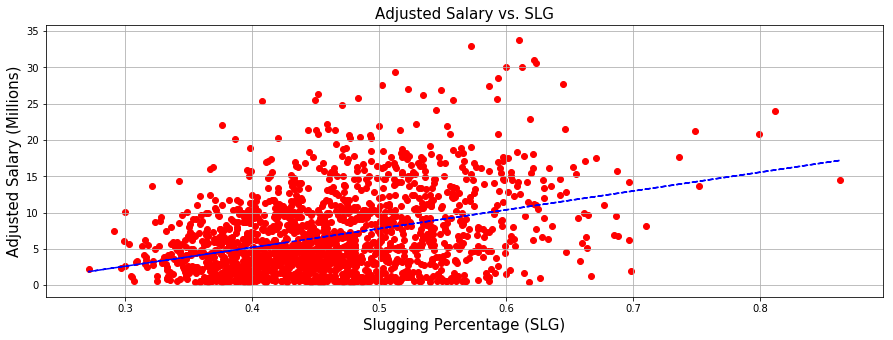

In [37]:
#-----BATTING PLAYER PLOTS-----

#Plotting Batting Player SLG And Salary

X = battingSalaries['TB']/battingSalaries['AB']
Y = (battingSalaries['Salary_Adjusted'])
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(0, 1, .1))
plt.xlabel('Slugging Percentage (SLG)', size = 15)
plt.ylabel('Adjusted Salary (Millions)', size = 15)
plt.title('Adjusted Salary vs. SLG', size = 15)

plt.scatter(X, Y, color = 'r')
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=0.0709162144105572x+1.2331808186629978
0.2918692950498092
r-squared: 8.52%


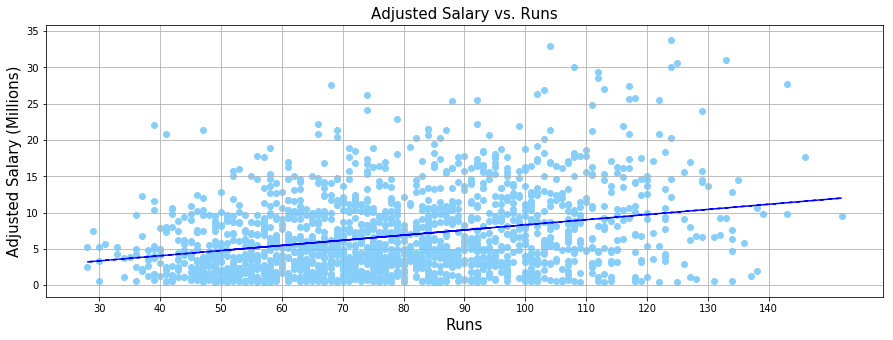

In [38]:
#-----BATTING PLAYER PLOTS-----

#Plotting Batting Player Runs And Salary

X = battingSalaries['R']
Y = (battingSalaries['Salary_Adjusted'])
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(0, 150, 10))
plt.xlabel('Runs', size = 15)
plt.ylabel('Adjusted Salary (Millions)', size = 15)
plt.title('Adjusted Salary vs. Runs', size = 15)

plt.scatter(X, Y, color = 'lightskyblue')
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=0.03043991231073022x+2.4157012852414246
0.17199209876448768
r-squared: 2.96%


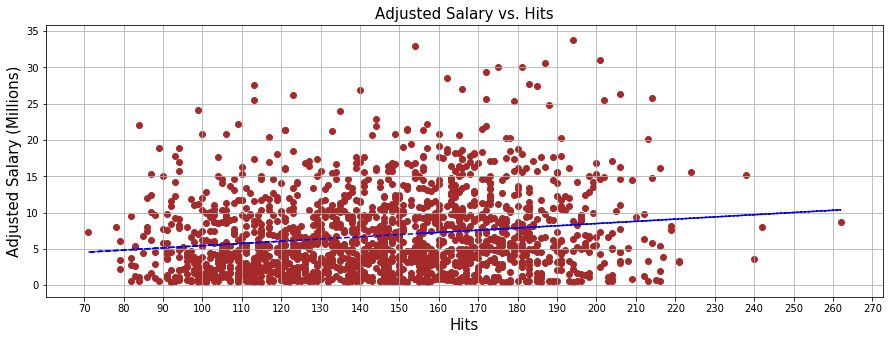

In [39]:
#-----BATTING PLAYER PLOTS-----

#Plotting Batting Player Hits And Salary


X = battingSalaries['H']
Y = (battingSalaries['Salary_Adjusted'])
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(0, 300, 10))
plt.xlabel('Hits', size = 15)
plt.ylabel('Adjusted Salary (Millions)', size = 15)
plt.title('Adjusted Salary vs. Hits', size = 15)

plt.scatter(X, Y, color = 'brown')
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

y=19.587062326694326x+-9.253160735492344
0.3951944195254578
r-squared: 15.62%


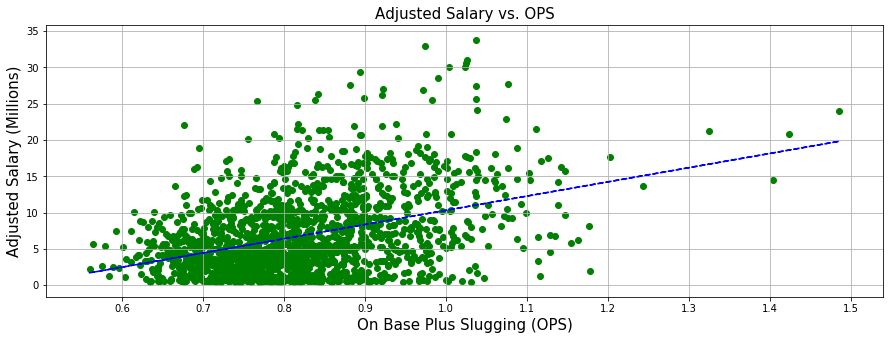

In [40]:
#-----BATTING PLAYER PLOTS-----

#Plotting Batting Player OPS And Salary


X = battingSalaries['OPS'].astype('float')
Y = (battingSalaries['Salary_Adjusted'])
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
fit = slope * X + intercept

plt.figure(figsize=(15,5))
plt.yticks(np.arange(0, 40, 5))
plt.xticks(np.arange(0, 2, .1))
plt.xlabel('On Base Plus Slugging (OPS)', size = 15)
plt.ylabel('Adjusted Salary (Millions)', size = 15)
plt.title('Adjusted Salary vs. OPS', size = 15)

plt.scatter(X, Y, color = 'green')
plt.plot(X, fit, 'b--')
plt.grid()
print(f"y={slope}x+{intercept}")
print(r_value)
print ("r-squared:", "{0:.2f}%".format(100*r_value**2))
plt.show()

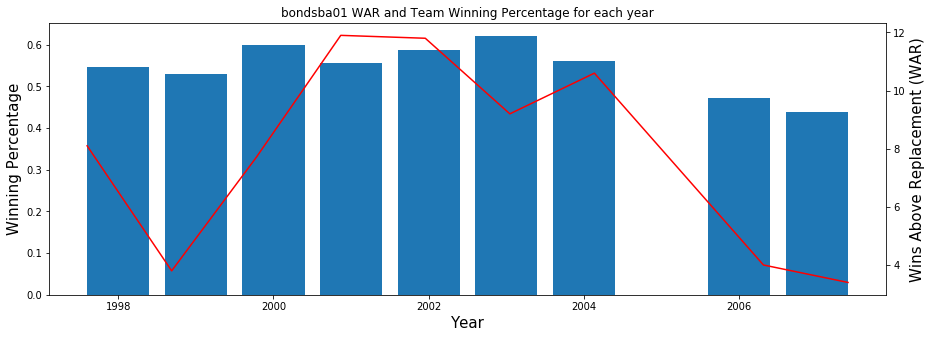

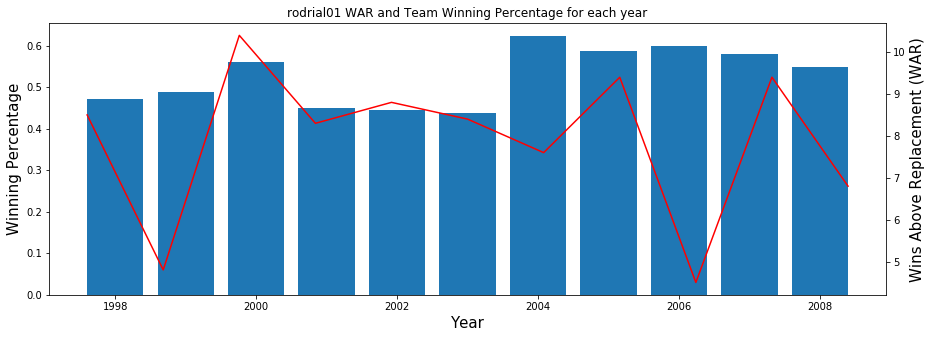

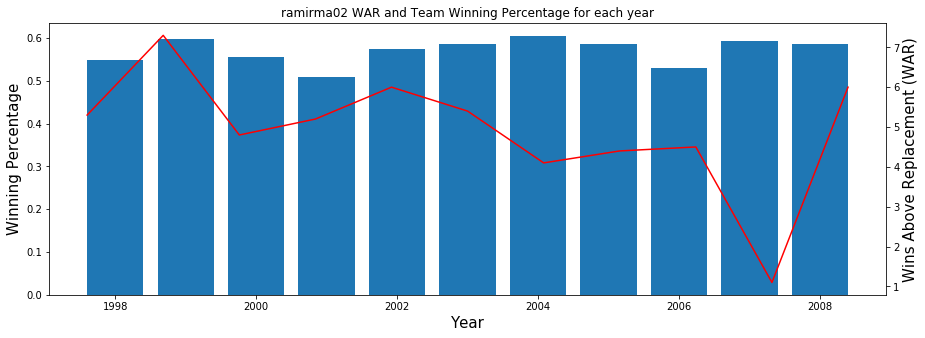

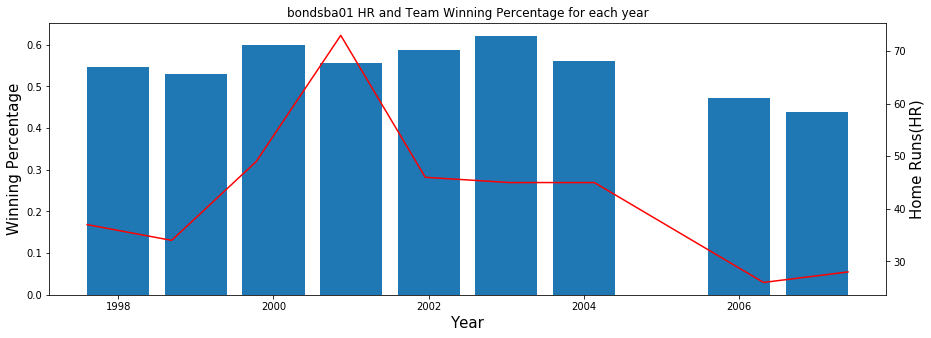

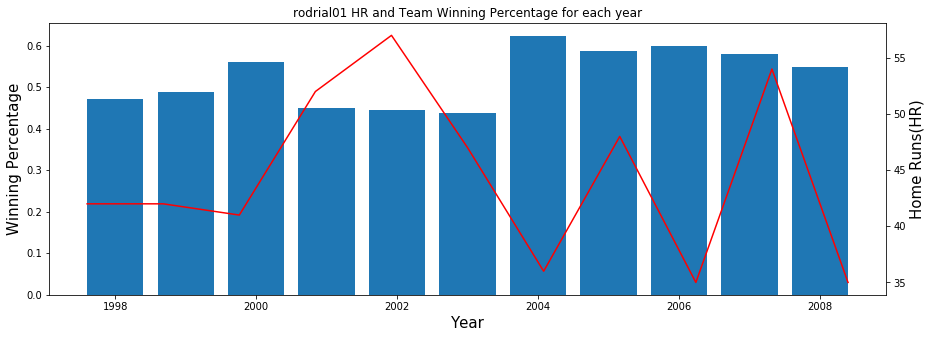

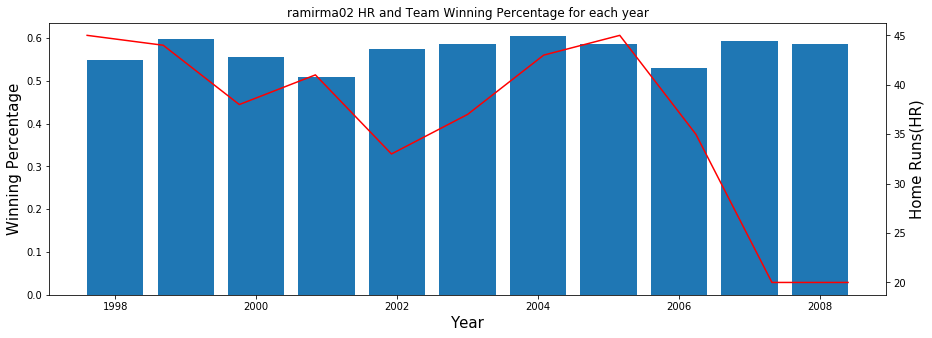

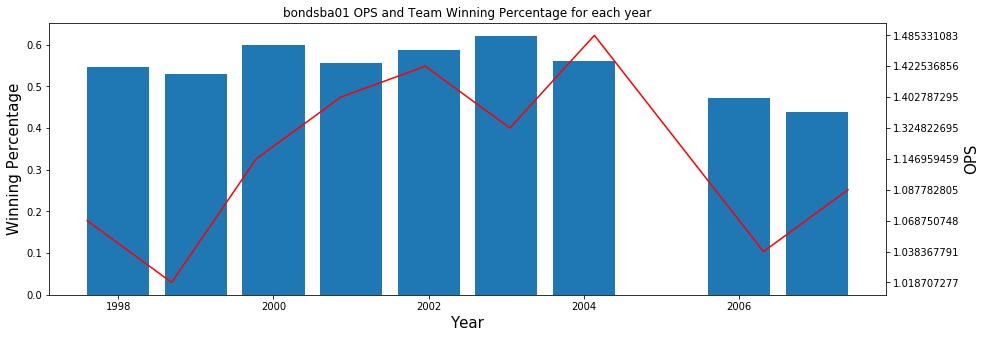

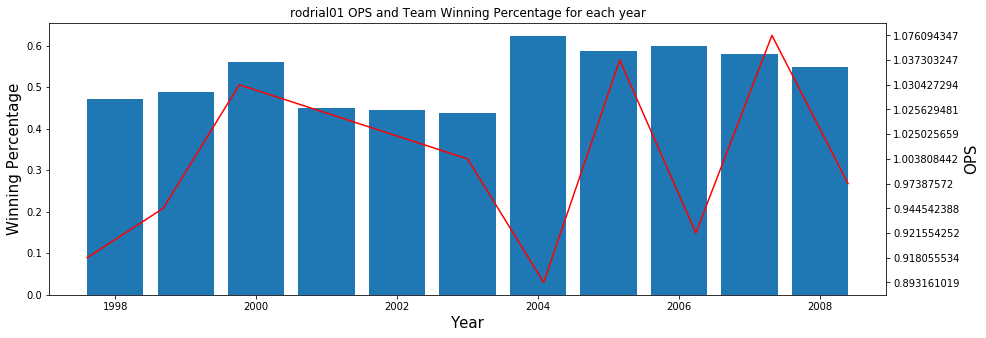

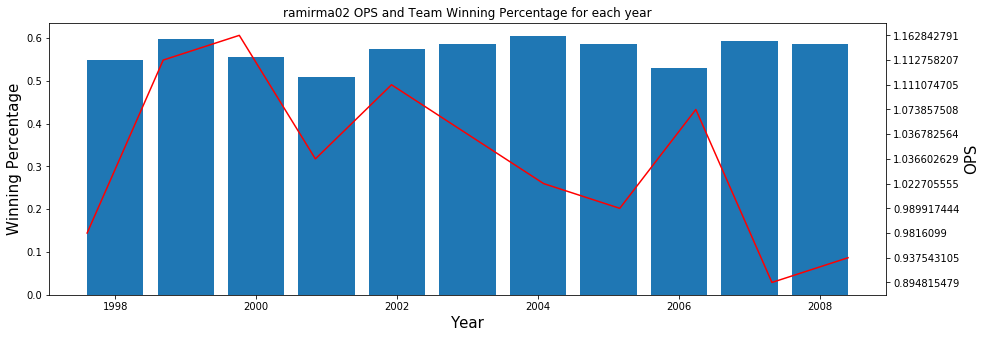

In [41]:
#-----BATTING PLAYER PLOTS-----

#Plotting Selected Players Stats

barryBonds = battingSalaries.loc[battingSalaries['playerID'] == 'bondsba01']
alexRod = battingSalaries.loc[battingSalaries['playerID'] == 'rodrial01']
manRam = battingSalaries.loc[battingSalaries['playerID'] == 'ramirma02']
manRam
bondsGiants = pd.merge(barryBonds, teamData, on= ['teamID', 'yearID'], how = 'left')
rodTeam = pd.merge(alexRod, teamData, on= ['teamID', 'yearID'], how = 'left')
manTeam = pd.merge(manRam, teamData, on= ['teamID', 'yearID'], how = 'left')
manTeam


def teamAndPlayer(z):
    x1=z["yearID"]
    y1=z["W%"]

    x2=z["yearID"]
    y2=z["WAR"]
    
    
    fig=plt.figure(figsize=(15, 5))
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)

    ax.bar(x1, y1)
    ax.set_xlabel("Year",size=15)
    ax.set_ylabel("Winning Percentage", size=15)
    plt.title(f"{z['playerID'][0]} WAR and Team Winning Percentage for each year")
    
    ax2.plot(x2, y2, color="r")
    ax2.yaxis.tick_right()
    ax2.set_ylabel('Wins Above Replacement (WAR)',size=15)
    ax2.yaxis.set_label_position('right') 
    ax2.tick_params(axis='x', which='both', bottom='off', top='off',labelbottom='off')
    ax2.tick_params(axis='y')
    
def teamAndPlayer1(z):
    x1=z["yearID"]
    y1=z["W%"]

    x2=z["yearID"]
    y2=z["HR"]
    
    
    fig=plt.figure(figsize=(15, 5))
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)

    ax.bar(x1, y1)
    ax.set_xlabel("Year",size=15)
    ax.set_ylabel("Winning Percentage", size=15)
    plt.title(f"{z['playerID'][0]} HR and Team Winning Percentage for each year")
    
    ax2.plot(x2, y2, color="r")
    ax2.yaxis.tick_right()
    ax2.set_ylabel('Home Runs(HR)',size=15)
    ax2.yaxis.set_label_position('right') 
    ax2.tick_params(axis='x', which='both', bottom='off', top='off',labelbottom='off')
    ax2.tick_params(axis='y')

def teamAndPlayer2(z):
    x1=z["yearID"]
    y1=z["W%"]

    x2=z["yearID"]
    y2=z["OPS"]
    
    
    fig=plt.figure(figsize=(15, 5))
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)

    ax.bar(x1, y1)
    ax.set_xlabel("Year",size=15)
    ax.set_ylabel("Winning Percentage", size=15)
    plt.title(f"{z['playerID'][0]} OPS and Team Winning Percentage for each year")
    
    ax2.plot(x2, y2, color="r")
    ax2.yaxis.tick_right()
    ax2.set_ylabel('OPS',size=15)
    ax2.yaxis.set_label_position('right') 
    ax2.tick_params(axis='x', which='both', bottom='off', top='off',labelbottom='off')
    ax2.tick_params(axis='y')

teamAndPlayer(bondsGiants)
teamAndPlayer(rodTeam)
teamAndPlayer(manTeam)

teamAndPlayer1(bondsGiants)
teamAndPlayer1(rodTeam)
teamAndPlayer1(manTeam)

teamAndPlayer2(bondsGiants)
teamAndPlayer2(rodTeam)
teamAndPlayer2(manTeam)

plt.show()

In [42]:
#MISCELLANEOUS PLOTS

# my_plot = consolidated_data_df.plot(kind="scatter", x="WAR",y="Adjusted_Salary",grid=True, figsize=(15,5),color=consolidated_data_df['TeamColors'], sizes=(consolidated_data_df['G']))
# plt.xlabel("WARs", size=15)
# plt.ylabel("Adjusted Salary(in Million)", size=15)
# plt.title("Adjusted Salary vs WARs", size=15)
# plt.yticks(np.arange(0, 350, 50.0))
# plt.xticks(np.arange(0, 200,10.0))
# # calc the trendline

# z = np.polyfit( consolidated_data_df["WAR"], consolidated_data_df["Adjusted_Salary"], 1)
# p = np.poly1d(z)
# plt.plot(consolidated_data_df["WAR"],p(consolidated_data_df["WAR"]),"r")
# # the line equation:
# print ("y=%.6fx+(%.6f)"%(z[0],z[1]))


# Y1=DF_wout_NYY_df["Adjusted_Salary"]
# X1=DF_wout_NYY_df["WAR"]
# slope, intercept, r_value, p_value, std_err = stats.linregress(X1,Y1)
# print(r_value)
# print ("r-squared:", "{0:.2f}%".format(100*r_value**2))


#-----TEAM PLOTS-----

#Plotting Winning Percentage and Salary per year (DID NOT USE FOR SLIDES)

# def team_winningpercent(z):
#     plt.figure(figsize=(15, 5))
#     plt.bar(z["yearID"], z["Adjusted_Salary"])
#     #,color=colors_by_year, sizes=(z['G'])
#     plt.bar( z["yearID"],z["Winning_%"])#,marker="^",color=colors_by_year, sizes=(z['G']))
#     plt.ylabel("Winning Percentage", size=15)
#     plt.xlabel("Years", size=15)
#     plt.title("Winning Percenetage and Salary vs. Year for Team: "+z["teamID"].unique(), size=15)
#     plt.yticks(np.arange(0, 300,20.0))
#     plt.grid()
#     plt.legend()

# result = team_winningpercent(Team_NYY)
# result = team_winningpercent(Team_OAK)
# result = team_winningpercent(Team_BOS)
# result = team_winningpercent(Team_KCR)

# #Choosing Colors for Individual Year
# colors_by_year=[]
# i=0
# while i < len(consolidated_data_df["yearID"].unique()):
#     colors_by_year.append((random.uniform(0, 1),random.uniform(0, 1), random.uniform(0, 1)))
#     i=i+1
# game_year= consolidated_data_df["yearID"].unique()
# colors_by_year_df=pd.DataFrame({"Color_year":colors_by_year,
#                                 "Year":game_year})   
# colors_by_year_df.head()